# Face Recognition using CNN

In [210]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools
import os
import cv2
import dlib
from imutils import face_utils
from tensorflow.keras import regularizers


In [103]:
def detect_faces(img):
    crop_img=[]
    face_detect = dlib.get_frontal_face_detector()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rects = face_detect(gray, 1)
    found_face = False
    for (i, rect) in enumerate(rects):
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        found_face = True
        crop_img = gray[y:y+h, x:x+w]
    
    
    return np.array(crop_img), found_face



def my_data(image_dir):
    data = []
    current_id = 0
    current_root=""
    for root, dirs, files in os.walk(image_dir): 
            for file in files:
                if file.endswith("png") or file.endswith("jpg"):
                    if (root !=current_root) :
                        current_id=current_id+1
                        current_root=root
                    path = os.path.join(root, file)
                    #res1 = "".join(re.split("[^a-zA-Z]*", file))
                    #label=str(res1)[:-3]
                    label=current_id
                    img_data = cv2.imread(path)
                    print(path)
                    img_crop,found_face=detect_faces(img_data)
                    if (found_face is True and  img_crop.size !=0):
                        img_crop = cv2.resize(img_crop, (60,60))
                        data.append([np.array(img_crop), label])
                      

    shuffle(data)
    return data





data = my_data(r"C:\Users\USER\Downloads\105_classes_pins_dataset")

C:\Users\USER\Downloads\105_classes_pins_dataset\pins_Adriana Lima\Adriana Lima0_0.jpg
C:\Users\USER\Downloads\105_classes_pins_dataset\pins_Adriana Lima\Adriana Lima101_3.jpg
C:\Users\USER\Downloads\105_classes_pins_dataset\pins_Adriana Lima\Adriana Lima102_4.jpg
C:\Users\USER\Downloads\105_classes_pins_dataset\pins_Adriana Lima\Adriana Lima103_5.jpg
C:\Users\USER\Downloads\105_classes_pins_dataset\pins_Adriana Lima\Adriana Lima104_6.jpg
C:\Users\USER\Downloads\105_classes_pins_dataset\pins_Adriana Lima\Adriana Lima105_7.jpg
C:\Users\USER\Downloads\105_classes_pins_dataset\pins_Adriana Lima\Adriana Lima106_8.jpg
C:\Users\USER\Downloads\105_classes_pins_dataset\pins_Adriana Lima\Adriana Lima107_9.jpg
C:\Users\USER\Downloads\105_classes_pins_dataset\pins_Adriana Lima\Adriana Lima108_10.jpg
C:\Users\USER\Downloads\105_classes_pins_dataset\pins_Adriana Lima\Adriana Lima109_11.jpg
C:\Users\USER\Downloads\105_classes_pins_dataset\pins_Adriana Lima\Adriana Lima10_2.jpg
C:\Users\USER\Download

In [206]:
Train=data[:15000]
Test=data[15000:]

x_train = np.array([i[0] for i in Train])
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = np.array([i[0] for i in Test])
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= np.array([i[1] for i in Train])
y_test= np.array([i[1] for i in Test])

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[[0.14509805 0.16078432 0.2        ... 0.21176471 0.18039216 0.16470589]
  [0.16862746 0.14901961 0.15294118 ... 0.23529412 0.17254902 0.22745098]
  [0.10980392 0.19607843 0.20784314 ... 0.19607843 0.13333334 0.16862746]
  ...
  [0.09411765 0.08235294 0.07058824 ... 0.00784314 0.00392157 0.01176471]
  [0.07450981 0.07058824 0.03921569 ... 0.00784314 0.00392157 0.00784314]
  [0.06666667 0.05490196 0.03529412 ... 0.00392157 0.00392157 0.00784314]]

 [[0.4509804  0.42352942 0.38431373 ... 0.24705882 0.22745098 0.1882353 ]
  [0.49803922 0.4627451  0.4392157  ... 0.2509804  0.23529412 0.21960784]
  [0.5294118  0.49803922 0.47058824 ... 0.28235295 0.24705882 0.13725491]
  ...
  [0.00392157 0.00392157 0.00392157 ... 0.05098039 0.01960784 0.05882353]
  [0.00392157 0.00392157 0.00392157 ... 0.02352941 0.03529412 0.16078432]
  [0.00392157 0.00392157 0.00392157 ... 0.09803922 0.1254902  0.2627451 ]]

 [[0.39607844 0.27058825 0.19215687 ... 0.6392157  0.6039216  0.43529412]
  [0.4313725

In [207]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.2, random_state=1500,)

In [208]:

im_rows=60
im_cols=60
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))
print('x_train shape: {}'.format(x_valid.shape[0]))

x_test shape: (12000, 60, 60)
x_train shape: 12000
x_test shape: (1881,)
x_train shape: 3000


In [238]:

#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu',kernel_regularizer=regularizers.l2(l2=0.002),
),
    Dense(1024, activation='relu',kernel_regularizer=regularizers.l2(l2=0.002)),
    Dense(512, activation='relu',kernel_regularizer=regularizers.l2(l2=0.002)),
    Dense(106, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

Show the model's parameters.

In [236]:
cnn_model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 54, 54, 36)        1800      
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 27, 27, 36)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 23, 23, 54)        48654     
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 11, 11, 54)        0         
_________________________________________________________________
flatten_41 (Flatten)         (None, 6534)              0         
_________________________________________________________________
dense_113 (Dense)            (None, 2000)              13070000  
_________________________________________________________________
dense_114 (Dense)            (None, 106)             

In [239]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=50,
    epochs=10,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/10
240/240 [==============================] - 76s 314ms/step - loss: 4.9648 - accuracy: 0.0150 - val_loss: 4.5259 - val_accuracy: 0.0193
Epoch 2/10
240/240 [==============================] - 76s 315ms/step - loss: 4.3164 - accuracy: 0.0555 - val_loss: 4.1851 - val_accuracy: 0.0713
Epoch 3/10
240/240 [==============================] - 75s 314ms/step - loss: 3.9640 - accuracy: 0.1156 - val_loss: 3.9729 - val_accuracy: 0.1133
Epoch 4/10
240/240 [==============================] - 75s 314ms/step - loss: 3.6666 - accuracy: 0.1753 - val_loss: 3.8390 - val_accuracy: 0.1530
Epoch 5/10
240/240 [==============================] - 75s 311ms/step - loss: 3.3992 - accuracy: 0.2305 - val_loss: 3.7088 - val_accuracy: 0.1927
Epoch 6/10
240/240 [==============================] - 75s 313ms/step - loss: 3.1545 - accuracy: 0.2876 - val_loss: 3.7388 - val_accuracy: 0.2043
Epoch 7/10
240/240 [==============================] - 75s 312ms/step - loss: 2.8948 - accuracy: 0.3473 - val_loss: 3.8175 - val_ac

In [110]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test))

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

144/144 [==============================] - 7s 47ms/step - loss: 10.7577 - accuracy: 0.2606
test los 10.7577
test acc 0.2606


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


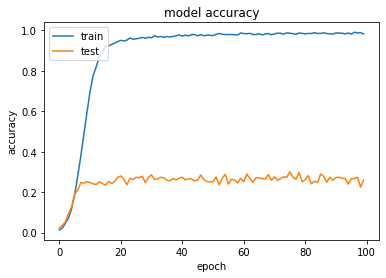

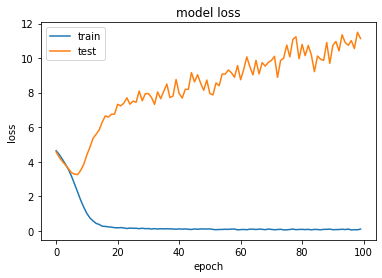

In [113]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [114]:
predicted =np.array( cnn_model.predict(x_test))
#print(predicted)
#print(y_test)
ynew = cnn_model.predict_classes(x_test)


Acc=accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)
#/tn, fp, fn, tp = confusion_matrix(np.array(y_test), ynew).ravel()
cnf_matrix=confusion_matrix(np.array(y_test), ynew)

y_test1 = np_utils.to_categorical(y_test, 20)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')

print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))

AttributeError: 'Sequential' object has no attribute 'predict_classes'